<center><h1> Image Filtering </h1></center>



<center> Applications in Python </center>

# Imports

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# Read image

In [14]:
img = cv2.imread('vision_6.jpg')

b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])

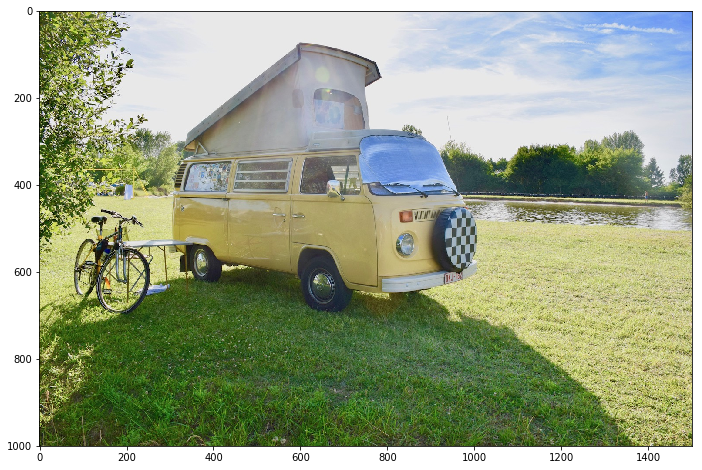

In [15]:
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.show()

# Denoising

##  1. Averaging

In [25]:
blur = cv2.blur(img,(15,15))

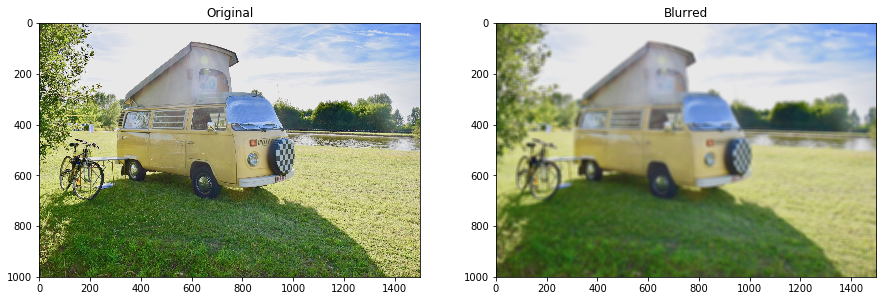

In [26]:
plt.figure(figsize=(15,12))

plt.subplot(121)
plt.imshow(img)
plt.title('Original')

plt.subplot(122)
plt.imshow(blur)
plt.title('Blurred')

plt.show()

##  2. Linear Filtering

In [40]:
ddepth = -1 

kernel_size = 15
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)
kernel /= (kernel_size * kernel_size)
        
dst = cv2.filter2D(img, ddepth, kernel)

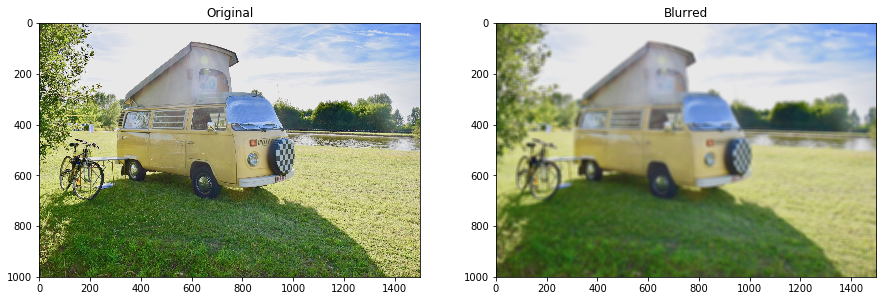

In [43]:
plt.figure(figsize=(15,12))

plt.subplot(121)
plt.imshow(img)
plt.title('Original')

plt.subplot(122)
plt.imshow(dst)
plt.title('Blurred')

plt.show()

##  3. Gaussian Filtering

In [48]:
blur = cv2.GaussianBlur(img,(15,15),10)

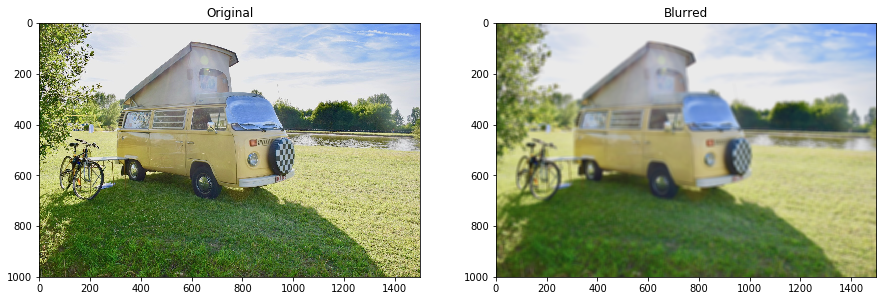

In [49]:
plt.figure(figsize=(15,12))

plt.subplot(121)
plt.imshow(img)
plt.title('Original')

plt.subplot(122)
plt.imshow(blur)
plt.title('Blurred')

plt.show()

# Sharpening

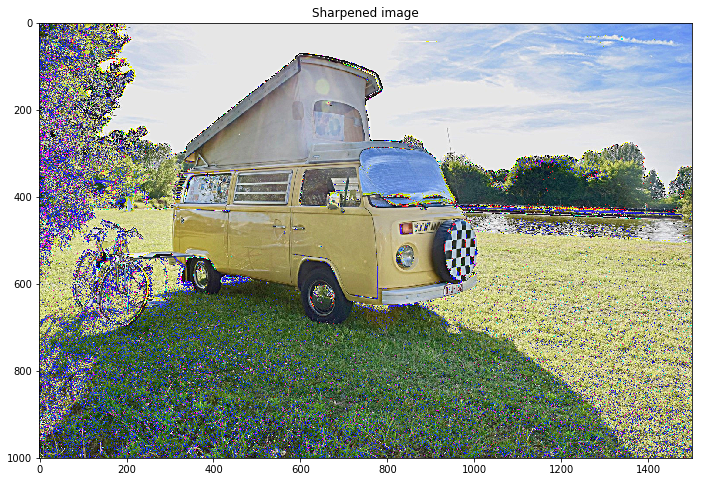

In [55]:
plt.figure(figsize=(12,8))

plt.imshow(2*img - blur)
plt.title('Sharpened image')

plt.show()

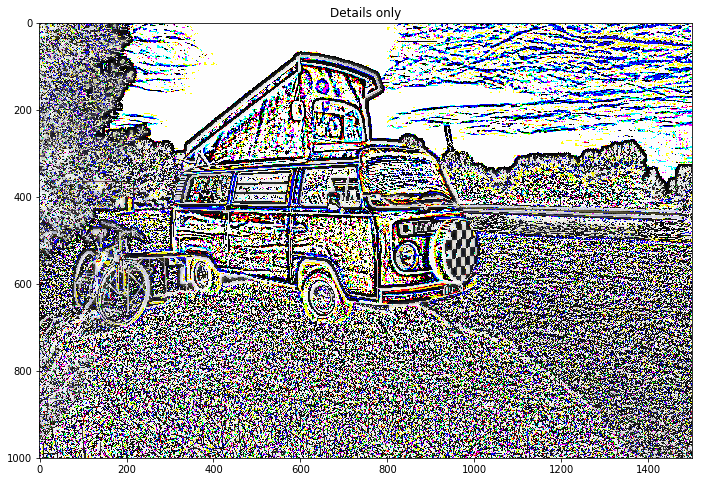

In [57]:
plt.figure(figsize=(12,8))

plt.imshow(img - blur)
plt.title('Details only')

plt.show()

# Image gradients

In [99]:
img = cv2.imread('vision_6.jpg', 0)
img = np.float32(img) / 255.0

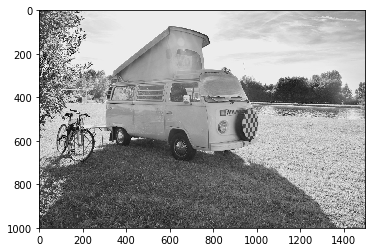

In [69]:
plt.imshow(img, 'gray')

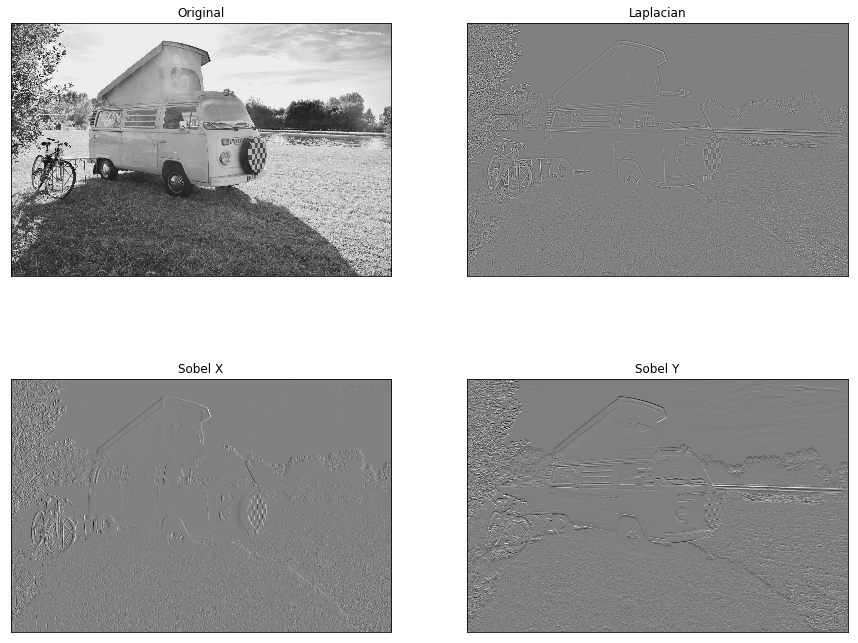

In [85]:
laplacian = cv2.Laplacian(img,-3,ksize=9)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.figure(figsize=(15,12))

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

# Edge Detector

In [141]:
img = cv2.imread('vision_6.jpg', 0)
edges = cv2.Canny(img,300,300)

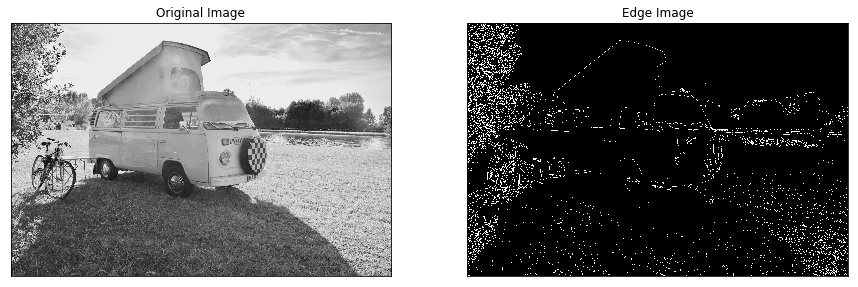

In [94]:
plt.figure(figsize=(15,12))

plt.subplot(121)
plt.imshow(img,cmap = 'gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')

plt.show()

# Upsampling, Downsampling

In [111]:
res = cv2.resize(img, None, fx=0.2, fy=0.2, interpolation = cv2.INTER_CUBIC)

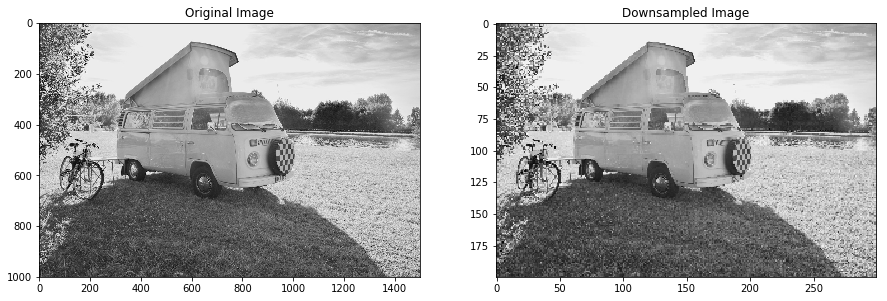

In [114]:
plt.figure(figsize=(15,12))

plt.subplot(121)
plt.imshow(img,cmap = 'gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(res,cmap = 'gray')
plt.title('Downsampled Image')

plt.show()

# Integral Images

In [140]:
tot = cv2.integral(img, 0)
pd.DataFrame(tot).head()

0     1     2     3     4     5     6     7     8     9      ...     \
0     0     0     0     0     0     0     0     0     0     0   ...      
1     0    80   175   265   344   418   493   567   626   681   ...      
2     0   140   298   388   467   541   690   838   962  1078   ...      
3     0   202   360   450   529   603   752   975  1177  1370   ...      
4     0   267   425   515   594   668   817  1109  1380  1646   ...      

      1491     1492     1493     1494     1495     1496     1497     1498  \
0        0        0        0        0        0        0        0        0   
1   296306   296452   296598   296744   296890   297036   297182   297327   
2   587313   587607   587900   588192   588484   588776   589068   589358   
3   874363   874806   875247   875686   876123   876560   876997   877432   
4  1161221  1161814  1162404  1162990  1163572  1164153  1164734  1165313   

      1499     1500  
0        0        0  
1   297471   297614  
2   589646   589932  
3   877864   878293  
4  1165888  1166460  

[5 rows x 1501 columns]

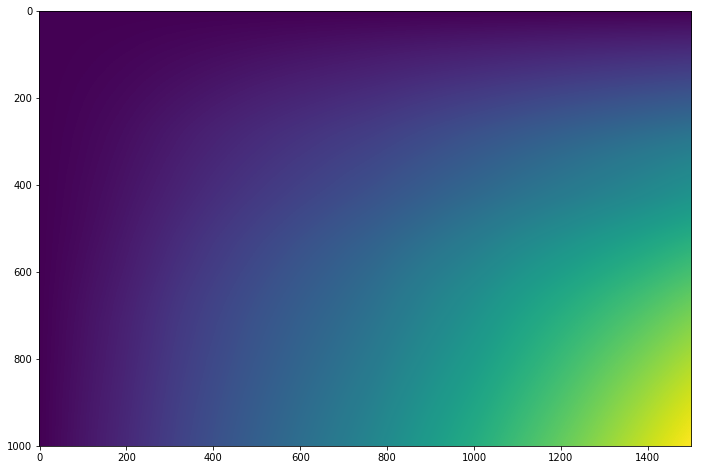

In [119]:
plt.figure(figsize=(12,8))
plt.imshow(tot)
plt.show()

# Bilateral Filtering

In [124]:
blur = cv2.bilateralFilter(img,9,75,75)

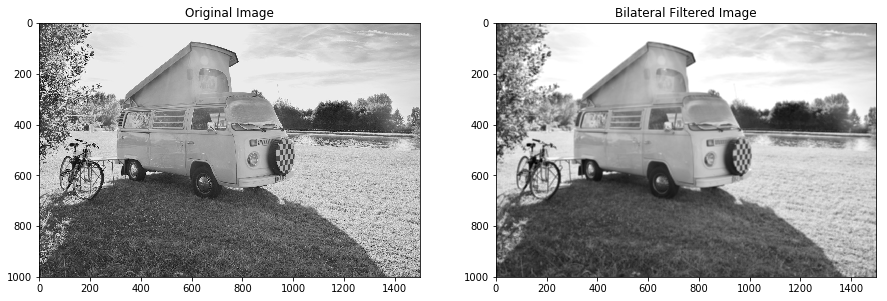

In [127]:
plt.figure(figsize=(15,12))

plt.subplot(121)
plt.imshow(img,cmap = 'gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(blur,cmap = 'gray')
plt.title('Bilateral Filtered Image')

plt.show()

# Harris Corner Detector

In [159]:
img = cv2.imread('vision_7.jpg', 0)
corn = img.copy()

dst = cv2.cornerHarris(img,3,5,0.22)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
corn[dst>0.01*dst.max()]=0

cv2.imshow('dst',img)

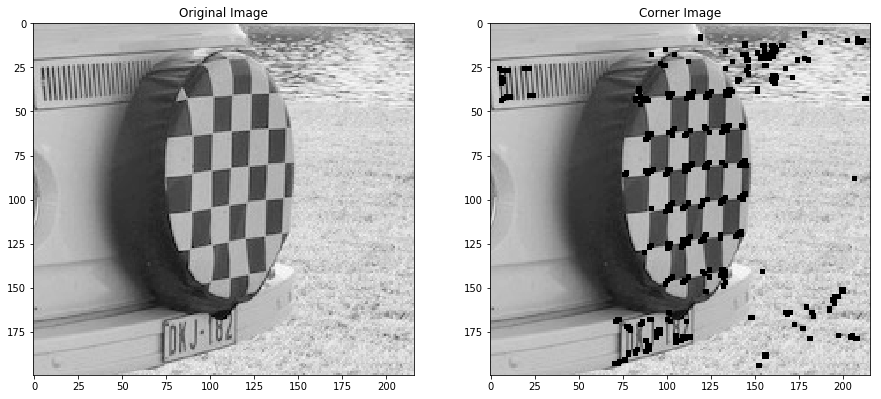

In [160]:
plt.figure(figsize=(15,12))

plt.subplot(121)
plt.imshow(img,cmap = 'gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(corn,cmap = 'gray')
plt.title('Corner Image')

plt.show()

# Blob Detection

In [211]:
img = cv2.imread('vision_7.jpg', 0)

detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(img)

In [214]:
img2 = img.copy()
for marker in keypoints:
    img2 = cv2.drawMarker(img2, tuple(int(i) for i in marker.pt), color=(0, 255, 255))

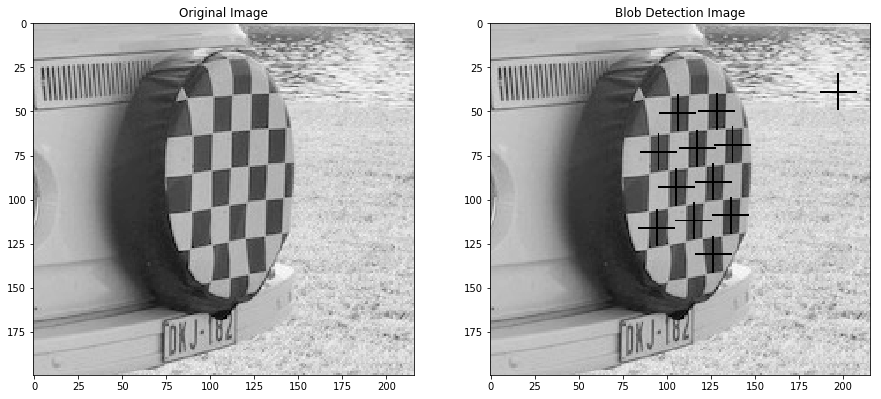

In [215]:
plt.figure(figsize=(15,12))

plt.subplot(121)
plt.imshow(img,cmap = 'gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(img2,cmap = 'gray')
plt.title('Blob Detection Image')

plt.show()

# SIFT Keypoint Detection

In [217]:
sift = cv2.xfeatures2d.SIFT_create()

kp = sift.detect(img,None)
img=cv2.drawKeypoints(img,kp,img)

error: OpenCV(4.0.0) /Users/travis/build/skvark/opencv-python/opencv_contrib/modules/xfeatures2d/src/sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'
